In [58]:
import pandas as pd
import numpy as np
import seaborn as snp
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [59]:
df=pd.read_csv('sample_data_for_cleaning.csv')
df

,ID,Name,Age,Salary,JoinDate,Department,Rating
0,1,Alice,25.0,50000.0,2020-01-15,HR,4.5
1,2,Bob,30.0,60000.0,2019-03-22,Finance,3.8
2,3,NaN,35.0,55000.0,2020-07-01,IT,NaN
3,4,David,NaN,52000.0,NaN,HR,4.2
4,5,Eve,29.0,NaN,2021-11-09,IT,4.0
5,6,Frank,40.0,62000.0,2018-08-10,Finance,NaN
6,7,Grace,22.0,58000.0,2019-12-05,IT,3.9
7,8,Hank,36.0,61000.0,2020-06-30,Finance,4.1
8,9,Ivy,NaN,53000.0,NaN,HR,3.7
9,10,John,28.0,59000.0,2021-03-01,IT,4.3


In [60]:
df.shape

(11, 7)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          11 non-null     int64  
 1   Name        10 non-null     object 
 2   Age         9 non-null      float64
 3   Salary      10 non-null     float64
 4   JoinDate    9 non-null      object 
 5   Department  11 non-null     object 
 6   Rating      9 non-null      float64
dtypes: float64(3), int64(1), object(3)
memory usage: 748.0+ bytes


In [62]:
df.describe()

,ID,Age,Salary,Rating
count,11.000000,9.000000,10.00000,9.000000
mean,5.181818,30.555556,57000.00000,4.033333
std,3.060006,5.614960,4189.93503,0.264575
min,1.000000,22.000000,50000.00000,3.700000
25%,2.500000,28.000000,53500.00000,3.800000
50%,5.000000,30.000000,58500.00000,4.000000
75%,7.500000,35.000000,60000.00000,4.200000
max,10.000000,40.000000,62000.00000,4.500000


In [63]:
df.isnull().sum()

ID            0
Name          1
Age           2
Salary        1
JoinDate      2
Department    0
Rating        2
dtype: int64

In [64]:
num_col = df.select_dtypes(include=['number']).columns
num_col

Index(['ID', 'Age', 'Salary', 'Rating'], dtype='object')

In [65]:
df[num_col].isnull().sum()

ID        0
Age       2
Salary    1
Rating    2
dtype: int64

<Axes: >

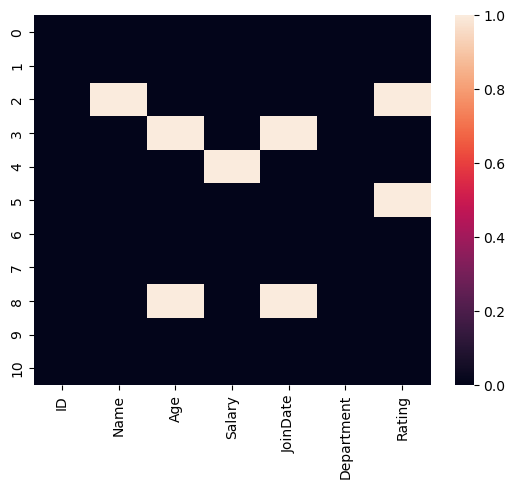

In [66]:
snp.heatmap(df.isnull())

In [82]:
#scaler=StandardScaler()
#df[num_col]=scaler.fit_transform(df[num_col])
#df[num_col]

In [83]:
Q1=df[num_col].quantile(0.25)
Q3=df[num_col].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print("Q1:\n", Q1)
print("Q3:\n", Q3)
print("IQR:\n", IQR)
print("Lower bound:\n", lower_bound)
print("Upper bound:\n", upper_bound)
outliers = df[num_col][(df[num_col] < lower_bound) | (df[num_col] > upper_bound)]
print("Outliers:\n", outliers)

Q1:
 ID       -0.919186
Age      -0.388292
Salary   -0.754732
Rating   -0.734968
Name: 0.25, dtype: float64
Q3:
 ID        0.794551
Age       0.419775
Salary    0.754732
Rating    0.467707
Name: 0.75, dtype: float64
IQR:
 ID        1.713737
Age       0.808068
Salary    1.509464
Rating    1.202676
dtype: float64
Lower bound:
 ID       -3.489791
Age      -1.600394
Salary   -3.018928
Rating   -2.538982
dtype: float64
Upper bound:
 ID        3.365156
Age       1.631877
Salary    3.018928
Rating    2.271721
dtype: float64
Outliers:
     ID       Age  Salary  Rating
0  NaN       NaN     NaN     NaN
1  NaN       NaN     NaN     NaN
2  NaN       NaN     NaN     NaN
3  NaN       NaN     NaN     NaN
4  NaN       NaN     NaN     NaN
5  NaN  1.784046     NaN     NaN
6  NaN -1.616136     NaN     NaN
7  NaN       NaN     NaN     NaN
8  NaN       NaN     NaN     NaN
9  NaN       NaN     NaN     NaN
10 NaN       NaN     NaN     NaN


In [84]:
mean=df[num_col].mean()
mean

ID        4.037175e-17
Age      -3.191891e-16
Salary   -3.027881e-17
Rating    2.018587e-16
dtype: float64

In [85]:
df[num_col]=df[num_col].fillna(mean)
df[num_col]

,ID,Age,Salary,Rating
0,-1.433307,-1.049439e+00,-1.761041e+00,1.870829e+00
1,-1.090560,-1.049439e-01,7.547319e-01,-9.354143e-01
2,-0.747812,8.395510e-01,-5.031546e-01,1.973730e-16
3,-0.405065,-3.161052e-16,-1.257887e+00,6.681531e-01
4,-0.062318,-2.938428e-01,-3.330669e-17,-1.336306e-01
5,0.280430,1.784046e+00,1.257887e+00,1.973730e-16
6,0.623177,-1.616136e+00,2.515773e-01,-5.345225e-01
7,0.965924,1.028450e+00,1.006309e+00,2.672612e-01
8,1.308672,-3.161052e-16,-1.006309e+00,-1.336306e+00
9,1.651419,-4.827418e-01,5.031546e-01,1.069045e+00


In [86]:
df[num_col].isnull().sum()

ID        0
Age       0
Salary    0
Rating    0
dtype: int64

In [87]:
df.isnull().sum()

ID            0
Name          0
Age           0
Salary        0
JoinDate      0
Department    0
Rating        0
dtype: int64

In [88]:
cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index(['Name', 'Department'], dtype='object')

In [89]:
mode=df[cat_col].mode()
mode

,Name,Department
0,Bob,Finance
1,NaN,IT


In [90]:
df['Name']=df['Name'].fillna('unkmown')
df['Name']

0       Alice
1         Bob
2     unkmown
3       David
4         Eve
5       Frank
6       Grace
7        Hank
8         Ivy
9        John
10        Bob
Name: Name, dtype: object

In [91]:
# Ensure the column is in datetime format
df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce')

# Calculate the median date
median_date = df['JoinDate'].median()

# Fill missing values with the median date
df['JoinDate'] = df['JoinDate'].fillna(median_date)

# Verify the changes
print(df['JoinDate'])

0    2020-01-15
1    2019-03-22
2    2020-07-01
3    2020-02-11
4    2021-11-09
5    2018-08-10
6    2019-12-05
7    2020-06-30
8    2020-02-11
9    2021-03-01
10   2019-03-22
Name: JoinDate, dtype: datetime64[ns]


In [81]:
df

,ID,Name,Age,Salary,JoinDate,Department,Rating
0,-1.433307,Alice,-1.049439e+00,-1.761041e+00,2020-01-15,HR,1.870829e+00
1,-1.090560,Bob,-1.049439e-01,7.547319e-01,2019-03-22,Finance,-9.354143e-01
2,-0.747812,unkmown,8.395510e-01,-5.031546e-01,2020-07-01,IT,1.973730e-16
3,-0.405065,David,-3.161052e-16,-1.257887e+00,2020-02-11,HR,6.681531e-01
4,-0.062318,Eve,-2.938428e-01,-3.330669e-17,2021-11-09,IT,-1.336306e-01
5,0.280430,Frank,1.784046e+00,1.257887e+00,2018-08-10,Finance,1.973730e-16
6,0.623177,Grace,-1.616136e+00,2.515773e-01,2019-12-05,IT,-5.345225e-01
7,0.965924,Hank,1.028450e+00,1.006309e+00,2020-06-30,Finance,2.672612e-01
8,1.308672,Ivy,-3.161052e-16,-1.006309e+00,2020-02-11,HR,-1.336306e+00
9,1.651419,John,-4.827418e-01,5.031546e-01,2021-03-01,IT,1.069045e+00
